# HW7

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# Overhead
url = 'https://f000.backblazeb2.com/file/jeldridge-data/011-univariate_density_estimation/data.csv'
df = pd.read_csv(url, header=None)
df = df.rename(columns={0: 'x', 1: 'y'})

## 3a.

In [3]:
class_0_data = df[df['y'] == 0]['x']
class_1_data = df[df['y'] == 1]['x']

mean_class_0 = np.mean(class_0_data)
std_class_0 = np.std(class_0_data)

mean_class_1 = np.mean(class_1_data)
std_class_1 = np.std(class_1_data)

print("\033[1mEstimated Parameters for p_X(x | Y = 0):\033[0m")
print("Mean:", mean_class_0)
print("Standard Deviation:", std_class_0)

print("\n\033[1mEstimated Parameters for p_X(x | Y = 1):\033[0m")
print("Mean:", mean_class_1)
print("Standard Deviation:", std_class_1)

Estimated Parameters for p_X(x | Y = 0):
Mean: 8.764004000000002
Standard Deviation: 1.47285727862003

Estimated Parameters for p_X(x | Y = 1):
Mean: 4.131046
Standard Deviation: 1.916530592629296


## 3b.

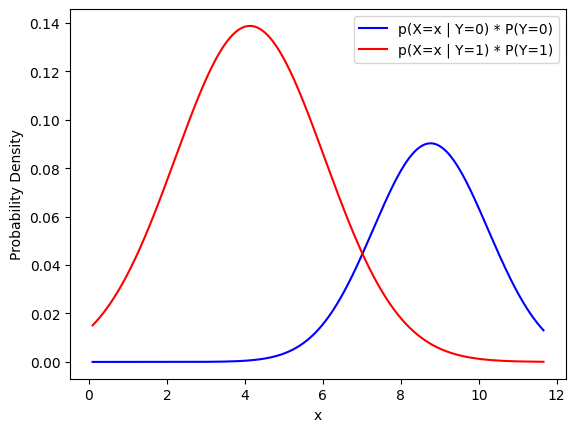

In [4]:
# Est P(Y=0) and P(Y=1)
P_Y0 = len(class_0_data) / len(df)
P_Y1 = len(class_1_data) / len(df)

# Generate guassians
x_values = np.linspace(df['x'].min(), df['x'].max(), 1000)
pX_Y0 = (1 / (np.sqrt(2 * np.pi) * std_class_0)) * np.exp(-0.5 * ((x_values - mean_class_0) / std_class_0) ** 2) * P_Y0
pX_Y1 = (1 / (np.sqrt(2 * np.pi) * std_class_1)) * np.exp(-0.5 * ((x_values - mean_class_1) / std_class_1) ** 2) * P_Y1

# Plot
plt.plot(x_values, pX_Y0, label='p(X=x | Y=0) * P(Y=0)', color='blue')
plt.plot(x_values, pX_Y1, label='p(X=x | Y=1) * P(Y=1)', color='red')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## 3c.

In [5]:
x_new = 6.271

# Calc bayes conditionals
likelihood_Y0 = (1 / (np.sqrt(2 * np.pi) * std_class_0)) * np.exp(-0.5 * ((x_new - mean_class_0) / std_class_0) ** 2)
likelihood_Y1 = (1 / (np.sqrt(2 * np.pi) * std_class_1)) * np.exp(-0.5 * ((x_new - mean_class_1) / std_class_1) ** 2)
posterior_Y0 = likelihood_Y0 * P_Y0
posterior_Y1 = likelihood_Y1 * P_Y1

# Pred
predicted_class = 0 if posterior_Y0 > posterior_Y1 else 1
print(f"Predicted class for x = {x_new}: {predicted_class}")

Predicted class for x = 6.271: 1


## 3d.

In [6]:
def decision_boundary_func(x):
    likelihood_Y0 = (1 / (np.sqrt(2 * np.pi) * std_class_0)) * np.exp(-0.5 * ((x - mean_class_0) / std_class_0) ** 2)
    likelihood_Y1 = (1 / (np.sqrt(2 * np.pi) * std_class_1)) * np.exp(-0.5 * ((x - mean_class_1) / std_class_1) ** 2)
    posterior_Y0 = likelihood_Y0 * P_Y0
    posterior_Y1 = likelihood_Y1 * P_Y1
    return posterior_Y0 - posterior_Y1

# Use fsolve to find the root (decision boundary)
decision_boundary = fsolve(decision_boundary_func, x0=6.0)[0]  # Starting from x=6.0
print(f"Decision boundary: {decision_boundary}")

Decision boundary: 7.016710944343051
